#Lista da Segunda Unidade#


##Questão 1##

###Letra (a)###
![i](https://cdn1.imggmi.com/uploads/2019/10/22/d1b18e0de380629c6f37570706933c7f-full.png)

---

###Letra (b)###
![ii](https://cdn1.imggmi.com/uploads/2019/10/22/26f6312f4ca0cbb5730a4af1a2244604-full.png)

---

###Letra (C)###

![iii](http://ronny.rest/media/blog/2017/2017_08_16_tanh/tanh_v_sigmoid.jpg)

Um dos problemas que ocorrem em ambas as funções é o desaparecimento do gradiente conforme ele ele se aproxima de 1 ou 0, no caso da funções sigmoid, e de 1 e -1 no caso da função tanh, conforme vemos nas imagens abaixo.

![Tanh e Gradiente](https://qph.fs.quoracdn.net/main-qimg-f068ffcd6db2d1b74a9f7e92930e856d)

![Sigmoid e Gradiente](https://qph.fs.quoracdn.net/main-qimg-68b20a2619c59e55c5841e13f412381b)






##Questão 2##


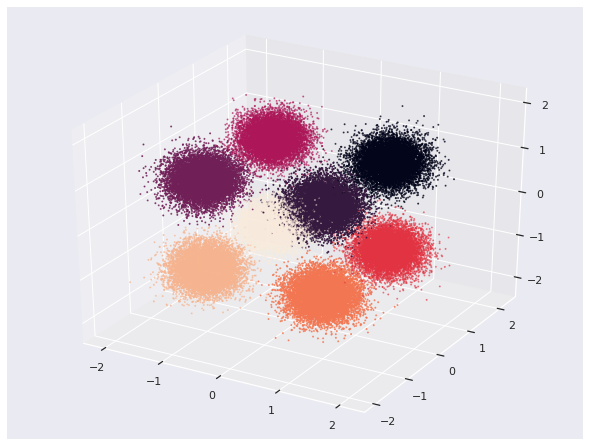

In [0]:
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import pandas as pd

base = norm.rvs(loc=((1, 1, 1), (1, -1, 1), (-1, -1, 1), (-1, 1, 1),
                    (1, 1, -1), (1, -1, -1), (-1, -1, -1), (-1, 1, -1)), scale=0.25, size=(10000, 8, 3))
X = np.reshape(base, (-1, 3))

labels = np.array([0, 1, 2, 3, 4, 5, 6, 7])
labels = np.tile(labels, int(X.shape[0]/8))
y = to_categorical(labels)

df = pd.DataFrame(np.concatenate((X.reshape(-1, 3), labels.reshape(-1, 1)), axis=1), 
                  columns=['x', 'y', 'z', 'l'])

sns.set()
fig = plt.figure(figsize=(8, 6))
plot = Axes3D(fig)
plot.scatter(xs=df['x'], ys=df['y'], zs=df['z'], c=df['l'], s=1)
plt.show()

In [0]:
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

inputs = Input(shape=(3,))
saida = Dense(8, activation='softmax')(inputs)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=saida)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

y_pred = model.predict(X_test) 

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm_df = pd.DataFrame(cm)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 20000 samples
Epoch 1/5





60000/60000 [==============================] - 8s 140us/step - loss: 1.4945 - acc: 0.4650 - val_loss: 0.8596 - val_acc: 0.9201
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5816 - acc: 0.9877 - val_loss: 0.3898 - val_acc: 0.9994
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2908 - acc: 0.9996 - val_loss: 0.2155 - val_acc: 0.9999
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.1696 - acc: 0.9998 - val_loss: 0.1324 - val_acc: 0.9999
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.1074 - acc: 0.9999 - val_loss: 0.0862 - val_acc: 0.9999


In [0]:
from sklearn.svm import SVC

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, labels, test_size=0.25, stratify=y, random_state=42)

classificador = SVC(kernel='linear')
classificador.fit(X_train_svm, y_train_svm) 

acc = classificador.score(X_test_svm, y_test_svm)
y_pred_svm = classificador.predict(X_test_svm)

print(f'Acurácia {acc}')

Acurácia 1.0


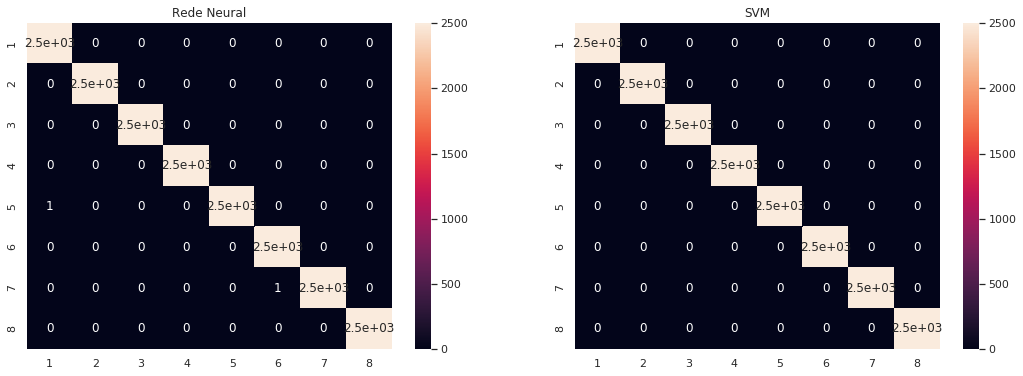

In [0]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
cm_df = pd.DataFrame(cm, index = [i for i in range(1, 9)],
                  columns = [i for i in range(1, 9)])

cm_svm = confusion_matrix(y_test_svm,y_pred_svm)
cm_df_svm = pd.DataFrame(cm_svm, index = [i for i in range(1, 9)],
                  columns = [i for i in range(1, 9)])

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(121)
sns.heatmap(cm_df, annot=True)
ax.set_title("Rede Neural")

bx = fig.add_subplot(122)
sns.heatmap(cm_df_svm, annot=True)
bx.set_title("SVM")
plt.show()

##Questão 3##

###Letra (a)###

In [0]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

a = np.array([int(i%8/4) for i in range(0, 8)])
b = np.array([int(i%4/2) for i in range(0, 8)])
c = np.array([i%2        for i in range(0, 8)])
xor = np.logical_xor(a, b)
xor = np.logical_xor(xor, c)

valores_bin = list(zip(a, b, c, xor.astype(int)))
dados = pd.DataFrame(valores_bin)
print(dados)
dados = np.tile(dados, (10000, 1))

   0  1  2  3
0  0  0  0  0
1  0  0  1  1
2  0  1  0  1
3  0  1  1  0
4  1  0  0  1
5  1  0  1  0
6  1  1  0  0
7  1  1  1  1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(dados[:, 0:3], dados[:, 3], test_size=0.25, random_state=42, stratify=dados[:, 3])

entrada_rede = Input(shape=(3, ))
c1 = Dense(16, activation="relu")(entrada_rede)
saida_rede = Dense(1, activation="sigmoid")(c1)

model = Model(inputs=entrada_rede, outputs=saida_rede)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse'])

hist = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 20000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4921 - mean_squared_error: 0.1567 - val_loss: 0.2693 - val_mean_squared_error: 0.0623
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.1341 - mean_squared_error: 0.0210 - val_loss: 0.0529 - val_mean_squared_error: 0.0031
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0279 - mean_squared_error: 0.0010 - val_loss: 0.0129 - val_mean_squared_error: 1.9274e-04
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0075 - mean_squared_error: 7.2047e-05 - val_loss: 0.0039 - val_mean_squared_error: 1.7250e-05
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0023 - mean_squared_error: 6.8933e-06 - val_loss: 0.0013 - val_mean_squared_error: 1.8406e-06


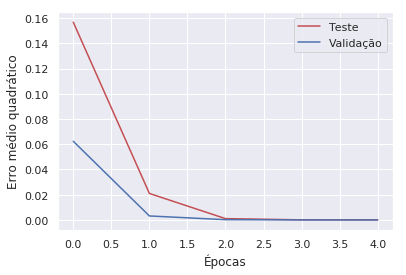

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hist.epoch, hist.history['mean_squared_error'], c='r')
plt.plot(hist.epoch, hist.history['val_mean_squared_error'], c='b')
plt.xlabel("Épocas")
plt.ylabel("Erro médio quadrático")
plt.legend(['Teste', 'Validação'])
plt.show()

##Letra (b)##

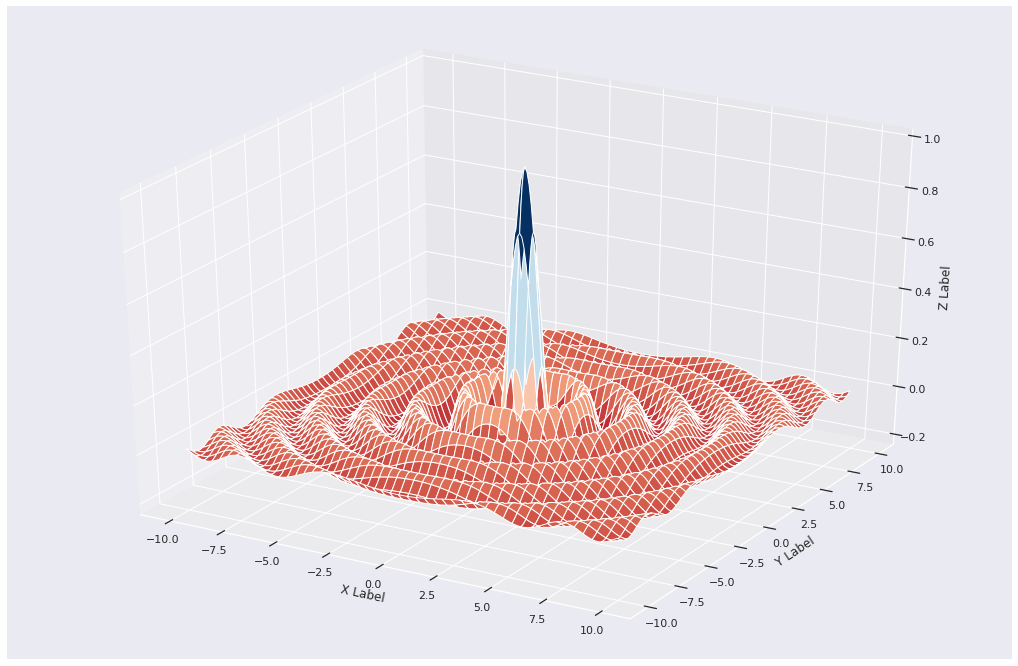

In [0]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras import Model
from mpl_toolkits.mplot3d import Axes3D

x = y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
z = np.sin(np.pi*np.sqrt(X**2+Y**2))/(np.pi*np.sqrt(X**2+Y**2))
Z = z.reshape(X.shape)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.RdBu)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [0]:
Xs = uniform.rvs(size=(50000, 2))*20-10
norms = np.linalg.norm(Xs, axis=1)
Ys = np.sin(np.pi*norms)/(np.pi*norms)

X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.25)

#muitas camadas e dimunuiçãão de neurônios grandes entre elas
entrada_rede = Input(shape=(2,))
c1 = Dense(128, activation="relu")(entrada_rede)
c2 = Dense(92, activation="relu")(c1)
c3 = Dense(64, activation="relu")(c2)
c4 = Dense(32, activation="relu")(c3)
saida_rede = Dense(1, activation="linear")(c4)

model = Model(inputs=entrada_rede, outputs=saida_rede)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=50, )

y_pred = model.predict(np.concatenate((X.reshape((-1, 1)), Y.reshape((-1, 1))), axis=1))

Train on 37500 samples, validate on 12500 samples
Epoch 1/30
37500/37500 [==============================] - 4s 115us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2/30
37500/37500 [==============================] - 4s 105us/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 3/30
37500/37500 [==============================] - 4s 106us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/30
37500/37500 [==============================] - 4s 107us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 5/30
37500/37500 [==============================] - 4s 106us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 6/30
37500/37500 [==============================] - 4s 105us/step - loss: 0.0011 - mean_squared_error: 0

(200, 200) (200, 200)


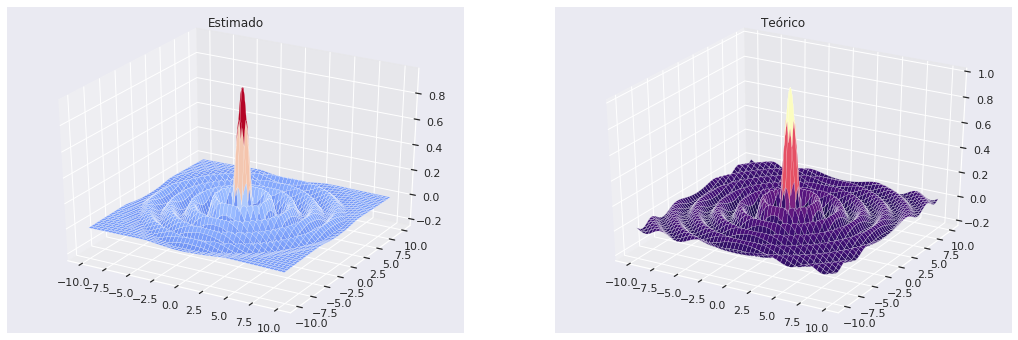

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

print(X.shape, y_pred.reshape(200, 200).shape)
fig = plt.figure(figsize=(18, 6))
ax = plt.subplot(121, projection='3d')
ax.plot_surface(X, Y, y_pred.reshape(200, 200), antialiased=True, linewidth=0.2, cmap=cm.coolwarm)
ax.set_title("Estimado")

bx = plt.subplot(122, projection='3d')
bx.plot_surface(X, Y, Z, antialiased=True, linewidth=0.2, cmap=cm.magma)
bx.set_title("Teórico")
plt.show()

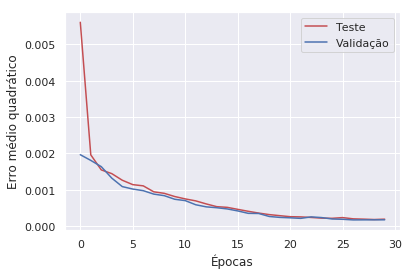

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hist.epoch, hist.history['mean_squared_error'], c='r')
plt.plot(hist.epoch, hist.history['val_mean_squared_error'], c='b')
plt.xlabel("Épocas")
plt.ylabel("Erro médio quadrático")
plt.legend(['Teste', 'Validação'])
plt.show()

##Letra (c)##

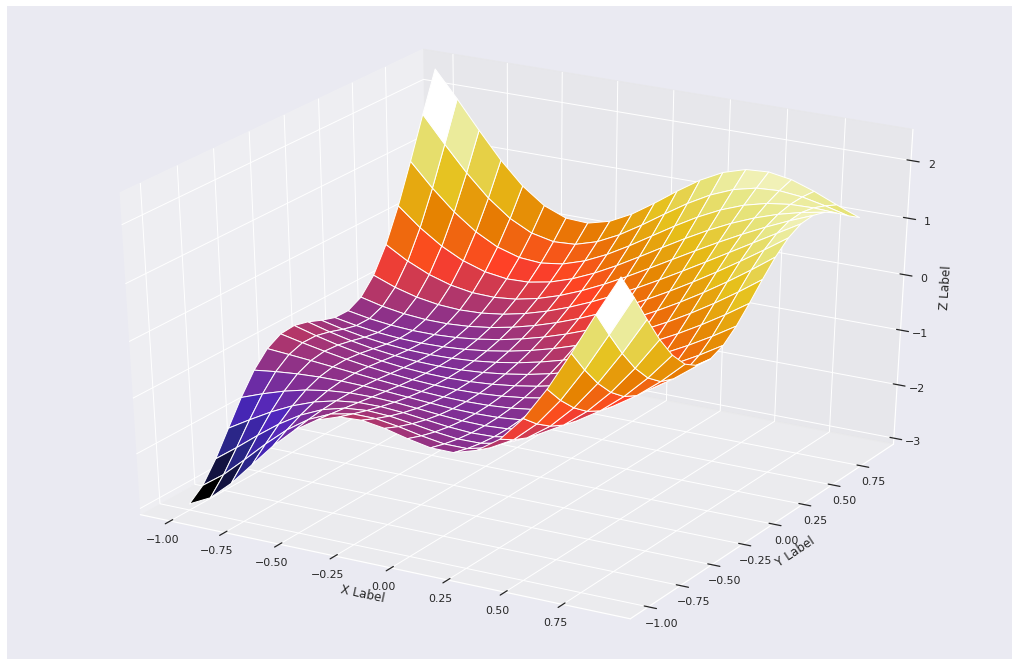

In [0]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

x = y = np.arange(-1.0, 1.0, 0.1)
X, Y = np.meshgrid(x, y)

zs = X**2 +Y**2 + 2*X*Y*np.cos(np.pi*X*Y) + X + Y - 1
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.CMRmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [0]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, Dropout
from keras import Model

x_model = uniform.rvs(size=(60000, 1))*2-1
y_model = uniform.rvs(size=(60000, 1))*2-1
z_model = x_model**2 + y_model**2 + 2*x_model*y_model*np.cos(np.pi*x_model*y_model) + x_model + y_model - 1
xy_model = np.concatenate((x_model, y_model), axis=1)

X_train, X_test, y_train, y_test = train_test_split(xy_model, z_model, test_size=0.25, random_state=42)

entrada = Input(shape=(2, ))
c1 = Dense(128, activation='relu')(entrada)
c2 = Dense(64, activation='relu')(c1)
c3 = Dense(32, activation='relu')(c2)
saida = Dense(1, activation='linear')(c3)

model = Model(inputs=entrada, outputs=saida)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
hist = model.fit(X_train, y_train, batch_size=100, epochs=30, validation_data=(X_test, y_test))

x = y = np.arange(-1.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
y_pred = model.predict(np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis=1))

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 3s 57us/step - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 2/30
45000/45000 [==============================] - 2s 49us/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/30
45000/45000 [==============================] - 2s 48us/step - loss: 5.9956e-04 - mean_squared_error: 5.9956e-04 - val_loss: 3.6897e-04 - val_mean_squared_error: 3.6897e-04
Epoch 4/30
45000/45000 [==============================] - 2s 48us/step - loss: 2.3222e-04 - mean_squared_error: 2.3222e-04 - val_loss: 3.4184e-04 - val_mean_squared_error: 3.4184e-04
Epoch 5/30
45000/45000 [==============================] - 2s 49us/step - loss: 1.6278e-04 - mean_squared_error: 1.6278e-04 - val_loss: 1.4053e-04 - val_mean_squared_error: 1.4053e-04
Epoch 6/30
45000/45000 [==============================] - 2s 49us/s

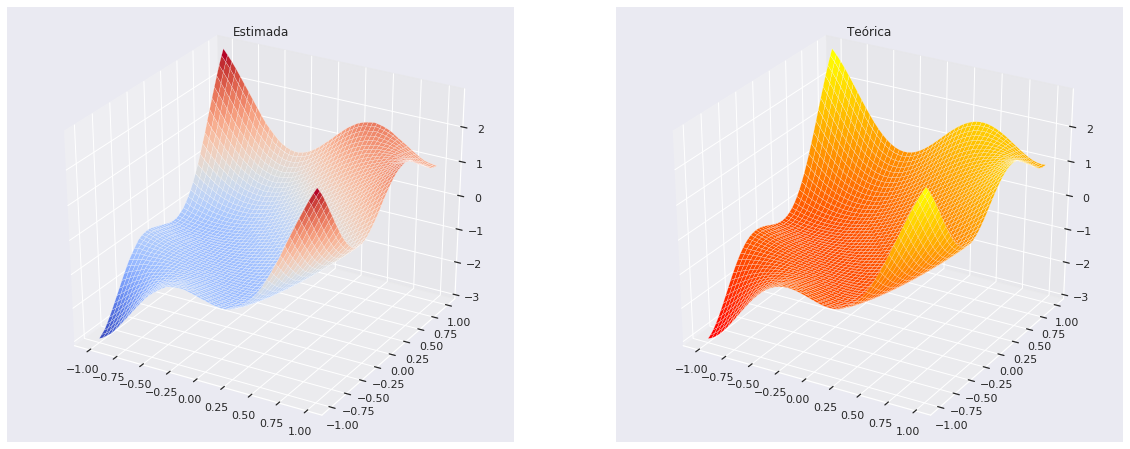

In [0]:
zs = X**2 +Y**2 + 2*X*Y*np.cos(np.pi*X*Y) + X + Y - 1
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(20, 8))
bx = fig.add_subplot(122, projection='3d')
bx.plot_surface(X, Y, Z, antialiased=True, linewidth=0.2, cmap=cm.autumn)
bx.set_title("Teórica")

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, y_pred.reshape(200, 200), antialiased=True, linewidth=0.2, cmap=cm.coolwarm)
ax.set_title("Estimada")
plt.show()

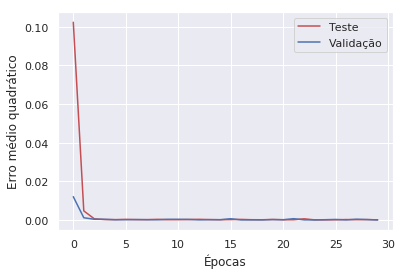

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hist.epoch, hist.history['mean_squared_error'], c='r')
plt.plot(hist.epoch, hist.history['val_mean_squared_error'], c='b')
plt.xlabel("Épocas")
plt.ylabel("Erro médio quadrático")
plt.legend(['Teste', 'Validação'])
plt.show()

#Questão 4#

<Figure size 1152x648 with 0 Axes>

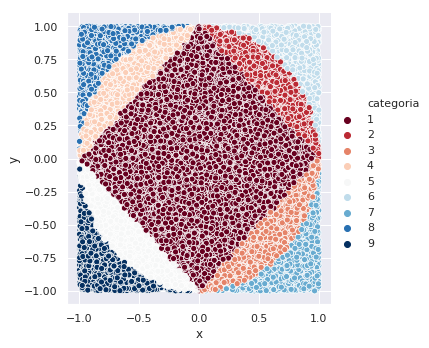

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def classificador(x):
  if(abs(x[0]) + abs(x[1]) <= 1):
    return 1
  elif(x[0]**2 + x[1]**2 <= 1):
    if(x[0]>0 and x[1]>0):
      return 2
    elif(x[0]>0 and x[1]<=0):
      return 3
    elif(x[0]<0 and x[1]>0):
      return 4
    else:
      return 5
  else:
    if(x[0]>0 and x[1]>0):
      return 6
    elif(x[0]>0 and x[1]<=0):
      return 7
    elif(x[0]<0 and x[1]>0):
      return 8
    else:
      return 9



X = np.random.uniform(-1, 1, size=(20000, 2))
X = pd.DataFrame(X, columns=["x", "y"])
X["categoria"] = X.apply(classificador, axis=1)

sns.set_context("notebook")
plt.figure(figsize = (16,9))
sns.relplot(data=X, x='x', y='y', kind='scatter', hue='categoria', palette='RdBu', legend="full")
plt.show()


In [0]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Input
from keras.models import Model

categorical_y = to_categorical(X.iloc[:, 2])
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, 0:2].values, categorical_y, test_size=0.2, stratify=categorical_y) 

entrada = Input(shape=(2,))
c1 = Dense(60, activation='relu')(entrada)
c2 = Dense(30, activation='relu')(c1)
saida = Dense(10, activation='softmax')(c2)

model = Model(inputs=entrada, outputs=saida)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 4s 230us/step - loss: 0.9722 - acc: 0.6646 - val_loss: 0.4613 - val_acc: 0.8642
Epoch 2/10
16000/16000 [==============================] - 3s 162us/step - loss: 0.3592 - acc: 0.9078 - val_loss: 0.2954 - val_acc: 0.9143
Epoch 3/10
16000/16000 [==============================] - 3s 161us/step - loss: 0.2475 - acc: 0.9366 - val_loss: 0.2198 - val_acc: 0.9333
Epoch 4/10
16000/16000 [==============================] - 3s 170us/step - loss: 0.1982 - acc: 0.9469 - val_loss: 0.1800 - val_acc: 0.9565
Epoch 5/10
16000/16000 [==============================] - 3s 168us/step - loss: 0.1674 - acc: 0.9529 - val_loss: 0.1523 - val_acc: 0.9655
Epoch 6/10
16000/16000 [==============================] - 3s 164us/step - loss: 0.1467 - acc: 0.9600 - val_loss: 0.1399 - val_acc: 0.9623
Epoch 7/10
16000/16000 [==============================] - 3s 164us/step - loss: 0.1327 - acc: 0.9637 - val_loss: 0.1318 - v

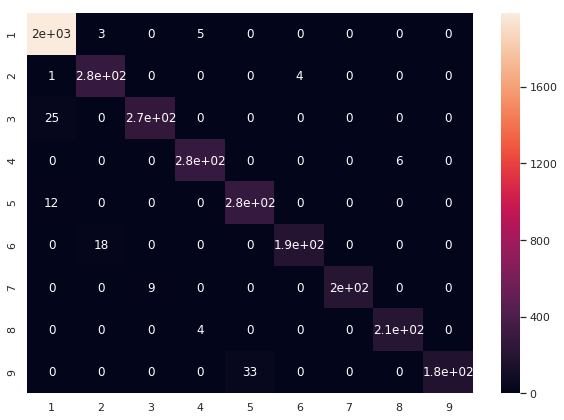

<Figure size 720x504 with 0 Axes>

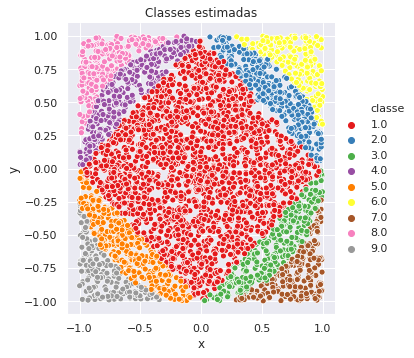

In [0]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

df_cm = pd.DataFrame(cm, index = [i for i in range(1, 10)],
                  columns = [i for i in range(1, 10)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

plt.figure(figsize = (10,7))
df = pd.DataFrame(np.concatenate((X_test.reshape(-1, 2), np.argmax(y_pred, axis=1).reshape(-1, 1)), axis=1), columns=['x', 'y', 'classe'])
sns.relplot(x='x', y='y', hue='classe', legend='full', data=df, palette='Set1')
plt.title("Classes estimadas")
plt.show()

##Questão 5##

In [0]:
from keras.layers import Dense, Input
import numpy as np
from keras.models import Model

dados = np.array([
    [0.9192, 0.4677, 0.1714, 0.0703, 0.1052],
    [0.7719, 0.9291, 0.3725, 0.1238, 0.0416],
    [0.0654, 0.4459, 0.9397, 0.3263, 0.3686],
    [0.4428, 0.1433, 0.1649, 0.9601, 0.4239],
    [0.07772, 0.2053, 0.2550, 0.5177, 0.9272]
])

entradas = np.tile(dados.reshape(-1, 25), (5000, 1))

input_data = Input(shape=(25,))
encoder = Dense(9, activation='sigmoid')(input_data)
decoder = Dense(25, activation='linear')(encoder)

model = Model(input_data, decoder)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(entradas, entradas, epochs=5, batch_size=10)

Using TensorFlow backend.









Epoch 1/5





5000/5000 [==============================] - 7s 1ms/step - loss: 0.0453 - acc: 0.4640
Epoch 2/5
5000/5000 [==============================] - 2s 382us/step - loss: 6.2133e-12 - acc: 1.0000
Epoch 3/5
5000/5000 [==============================] - 2s 401us/step - loss: 1.7889e-14 - acc: 1.0000
Epoch 4/5
5000/5000 [==============================] - 2s 403us/step - loss: 7.8168e-15 - acc: 1.0000
Epoch 5/5
5000/5000 [==============================] - 2s 364us/step - loss: 3.5791e-15 - acc: 1.0000


In [0]:
#Definindo o Encoder
encoder_in = Input(shape=(25, ))
encoder_out = Dense(9, activation='sigmoid')(encoder_in)
encoder = Model(encoder_in, encoder_out)

#Copiando weights
encoder.layers[1].set_weights(model.layers[1].get_weights())

#Definido o decoder
decoder_in = Input(shape=(9, ))
decoder_out = Dense(25, activation='linear')(decoder_in)
decoder = Model(decoder_in, decoder_out)

#Copiando weights
decoder.layers[1].set_weights(model.layers[2].get_weights())

print("Matriz original")
print(dados.reshape(5, 5))

compactado = encoder.predict(dados.reshape(-1, 25))
print("Matrix compactada")
print(compactado.reshape(3, 3))
descompactado = decoder.predict(compactado)

print("Matriz descompactada")
print(descompactado.reshape(5, 5))

snr = 10*np.log10( (dados ** 2).sum() / (((dados.reshape(-1, 25) - descompactado) ** 2)).sum())
print(f"Snr: {snr} dB")

Matriz original
[[0.9192  0.4677  0.1714  0.0703  0.1052 ]
 [0.7719  0.9291  0.3725  0.1238  0.0416 ]
 [0.0654  0.4459  0.9397  0.3263  0.3686 ]
 [0.4428  0.1433  0.1649  0.9601  0.4239 ]
 [0.07772 0.2053  0.255   0.5177  0.9272 ]]
Matrix compactada
[[0.7993934  0.84491944 0.7205219 ]
 [0.69610584 0.4903803  0.45494625]
 [0.31554663 0.7052054  0.32140577]]
Matriz descompactada
[[0.91919994 0.4677     0.17140006 0.07029999 0.10519998]
 [0.7719002  0.92909986 0.37250003 0.12379999 0.0416    ]
 [0.06539999 0.4458999  0.9397     0.32630002 0.3686    ]
 [0.44279996 0.14329997 0.1649     0.96010005 0.4239    ]
 [0.07772005 0.20529997 0.25499997 0.5177     0.9272001 ]]
Snr: 138.8227595028696 dB


##Questão 4 - Placas ##

In [0]:
#Geração de placas

import numpy as np
import cv2
import random
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

font = cv2.FONT_HERSHEY_SIMPLEX

caracteres =  ['A', 'E', 'I', 'O', 'U']
numeros = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

lb = LabelBinarizer()
lb.fit(caracteres+numeros)

np.random.seed(42)
placas_img = []
placas_labels = []
for j in range(1000):
    placa_img = np.zeros((28, 168, 1), np.uint8)
    placa = random.choices(caracteres, k=2)
    placa += random.choices(numeros, k=4)

    for i, text in enumerate(placa):
        mat = np.zeros((28, 28, 1), np.uint8)
        # get boundary of this text
        textsize = cv2.getTextSize(text, font, 1, 2)[0]

        # get coords based on boundary
        textX = int((28 - textsize[0]) / 2)
        textY = int((28 + textsize[1]) / 2)

        # add text centered on image
        cv2.putText(mat, text, (textX, textY), font, 1, 255, 2)

        x_noise = np.random.choice(np.arange(0, 28), int(0.3*28*28))
        y_noise = np.random.choice(np.arange(0, 28), int(0.3 * 28 * 28))

        for x, y in zip(x_noise, y_noise):
            mat[x, y] = abs(np.random.normal(mat[x, y], 100))

        rotation_mat = cv2.getRotationMatrix2D((14, 14), np.random.normal(0, 5), 1.0)
        rotated_mat = cv2.warpAffine(mat, rotation_mat, (28, 28))

        placa_img[:, i*28:28*(i+1), 0] = rotated_mat

    placas_img.append(placa_img)
    placas_labels.append(
        lb.transform(placa)
    )

Using TensorFlow backend.


In [0]:
#CNN
X_train, X_test, y_train, y_test = train_test_split(np.stack(placas_img, axis=0), np.stack(placas_labels).reshape(-1, 90), test_size=0.25, random_state=42)

entrada = Input(shape=(28, 168,1, ))
c1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', strides=2)(entrada)
c2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', strides=2)(c1)
c3 = Flatten()(c2)
c4 = Dense(512, activation='relu')(c3)
c5 = Dense(256, activation='relu')(c4)
saida = Dense(90, activation='sigmoid')(c5)

model = Model(inputs=entrada, outputs=saida)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 1.0720 - acc: 0.8783 - val_loss: 0.3935 - val_acc: 0.9027
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2303 - acc: 0.9315 - val_loss: 0.1697 - val_acc: 0.9404
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1088 - acc: 0.9600 - val_loss: 0.0861 - val_acc: 0.9685
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0308 - acc: 0.9895 - val_loss: 0.0449 - val_acc: 0.9838
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0351 - val_acc: 0.9881
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0245 - val_acc: 0.9920
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 9.4287e-04 - acc: 0.9999 - val_loss: 0.0298 - val_acc: 0.9909
Epoch 8/10
750/750 [======

In [0]:
#Exemplo da última placa
from google.colab.patches import cv2_imshow
import cv2

y_pred = model.predict(X_test[0].reshape(1, 28, 168, 1))
y_pred = np.reshape(y_pred, (-1, 15))
placa_str = lb.inverse_transform(y_pred)
print(''.join(placa_str))

cv2_imshow(X_test[0][:, :, 0])

y_pred = model.predict(X_test[1].reshape(1, 28, 168, 1))
y_pred = np.reshape(y_pred, (-1, 15))
placa_str = lb.inverse_transform(y_pred)
print(''.join(placa_str))

cv2_imshow(X_test[1][:, :, 0])

y_pred = model.predict(X_test[2].reshape(1, 28, 168, 1))
y_pred = np.reshape(y_pred, (-1, 15))
placa_str = lb.inverse_transform(y_pred)
print(''.join(placa_str))

cv2_imshow(X_test[2][:, :, 0])

y_pred = model.predict(X_test[3].reshape(1, 28, 168, 1))
y_pred = np.reshape(y_pred, (-1, 15))
placa_str = lb.inverse_transform(y_pred)
print(''.join(placa_str))

cv2_imshow(X_test[3][:, :, 0])

II0003


OU7001


EI0795


AI5185


##Questão 6##

###Questão 6 - Rede Neural###

In [0]:
import numpy as np
import cv2
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

theta = np.arange(0, 20, 0.001)

espiral_0_x = (theta/4) * np.cos(theta)
espiral_0_y = (theta/4) * np.sin(theta)
espiral_1_x = ((theta/4) + 0.8) * np.cos(theta)
espiral_1_y = ((theta/4) + 0.8) * np.sin(theta)

dados_espiral_0 = pd.DataFrame()

dados_espiral_0['x'] = espiral_0_x
dados_espiral_0['y'] = espiral_0_y
dados_espiral_0['classe'] = 0

dados_espiral_1 = pd.DataFrame()

dados_espiral_1['x'] = espiral_1_x
dados_espiral_1['y'] = espiral_1_y
dados_espiral_1['classe'] = 1

dados_espirais = pd.concat([dados_espiral_0, dados_espiral_1]).reset_index(drop=True)

dados_espirais.head()

,x,y,classe
0,0.00000,0.000000e+00,0
1,0.00025,2.500000e-07,0
2,0.00050,9.999993e-07,0
3,0.00075,2.249997e-06,0
4,0.00100,3.999989e-06,0


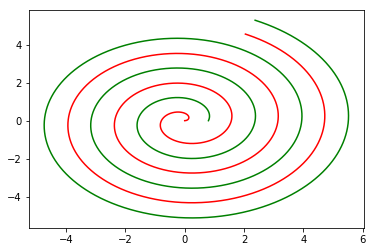

In [0]:
import matplotlib.pyplot as plt

plt.plot(dados_espirais[dados_espirais['classe']==0].iloc[:, 0], dados_espirais[dados_espirais['classe']==0].iloc[:, 1], c='r')
plt.plot(dados_espirais[dados_espirais['classe']==1].iloc[:, 0], dados_espirais[dados_espirais['classe']==1].iloc[:, 1], c='g')
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dados_espirais[['x', 'y']], 
                                                    dados_espirais['classe'], 
                                                    test_size=0.25, 
                                                    stratify=dados_espirais['classe'])


In [0]:
from keras.regularizers import l2

entradas = Input(shape=(2, ))
c1 = Dense(256, activation='relu')(entradas)
c2 = Dense(128, activation='relu')(c1)
c3 = Dense(64, activation='relu')(c2)
c4 = Dense(32, activation='relu')(c3)
saidas = Dense(1, activation='sigmoid')(c4)

model = Model(inputs=entradas, outputs=saidas)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs=10, validation_data=(X_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 4s 137us/step - loss: 0.5027 - acc: 0.6883 - val_loss: 0.3691 - val_acc: 0.7607
Epoch 2/10
30000/30000 [==============================] - 4s 125us/step - loss: 0.1919 - acc: 0.9021 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 3/10
30000/30000 [==============================] - 4s 123us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 5.3027e-04 - val_acc: 1.0000
Epoch 4/10
30000/30000 [==============================] - 4s 122us/step - loss: 3.2817e-04 - acc: 1.0000 - val_loss: 2.0943e-04 - val_acc: 1.0000
Epoch 5/10
30000/30000 [==============================] - 4s 126us/step - loss: 1.4677e-04 - acc: 1.0000 - val_loss: 1.0561e-04 - val_acc: 1.0000
Epoch 6/10
30000/30000 [==============================] - 4s 131us/step - loss: 7.8390e-05 - acc: 1.0000 - val_loss: 6.0060e-05 - val_acc: 1.0000

[]

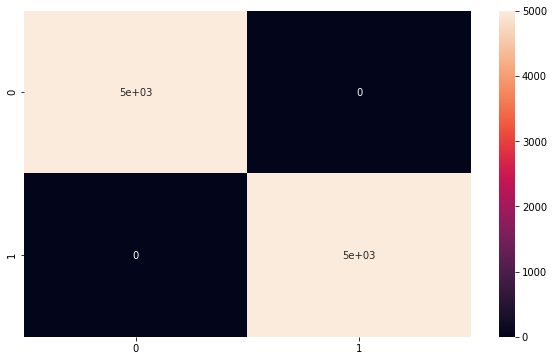

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, np.around(y_pred))
cm_df = pd.DataFrame(cm)
sns.heatmap(data=cm_df, annot=True)
plt.plot()

###Questão 6 - SVM###

In [0]:
#SVM

from sklearn.svm import SVC

classificador = SVC(gamma='auto')
classificador.fit(X_train, y_train) 

acc = classificador.score(X_test, y_test)
y_pred_svm = classificador.predict(X_test)

print(f'Acurácia {acc}')

Acurácia 1.0


[]

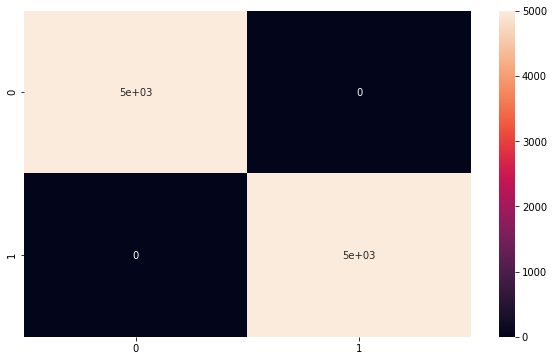

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_svm = model.predict(X_test)

plt.figure(figsize=(10, 6))
cm_svm = confusion_matrix(y_test, np.around(y_pred_svm))
cm_df_svm = pd.DataFrame(cm_svm)
sns.heatmap(data=cm_df_svm, annot=True)
plt.plot()

## Questão 7


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [0]:
# Uma função apenas para gerar o dataset a partir de uma lista.
# Por exemplo: se a lista for [1, 2, 3, 4, 5], para uma janela=3,
# a saída será: x = [[1, 2, 3], [2, 3, 4]] e y=[4, 5]
def dataset(data, window=1, shuffle=True):
  n = len(data)
  x = []
  y = []
  
  for i in range(n-window):
    x.append(data[i:i+steps])
    y.append(data[i+steps])
    
  if shuffle:
    xy = list(zip(x, y))
    np.random.shuffle(xy)
    x, y = zip(*xy)
    
  x = np.array(x)
  x = x.reshape(x.shape[0], x.shape[1], 1)
  y = np.array(y)
  y = y.reshape(x.shape[0], 1)
  
  return x, y

In [0]:
samples = 100
steps = 1
shuffle = True

n = np.arange(0, samples, 1)
yn = np.log(1+n+np.sin(n))

X_train, y_train = dataset(yn, steps)
X_test, y_test = dataset(yn, steps, shuffle=False)

entradas = Input(shape=(1, 1, ))
narx = SimpleRNN(4, activation='relu')(entradas)
saida = Dense(1, activation='linear')(narx)

model = Model(inputs=entradas, outputs=saida)
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
hist = model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
99/99 [==============================] - 3s 29ms/step - loss: 14.6082 - mean_squared_error: 14.6082
Epoch 2/50
99/99 [==============================] - 1s 6ms/step - loss: 4.5797 - mean_squared_error: 4.5797
Epoch 3/50
99/99 [==============================] - 1s 5ms/step - loss: 1.1195 - mean_squared_error: 1.1195
Epoch 4/50
99/99 [==============================] - 1s 6ms/step - loss: 0.2126 - mean_squared_error: 0.2126
Epoch 5/50
99/99 [==============================] - 1s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 6/50
99/99 [==============================] - 1s 5ms/step - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 7/50
99/99 [==============================] - 1s 6ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 8/50
99/99 [==============================] - 1s 6ms/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 9/50
99/99 [==============================] - 1s 5ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 10/50
99/99 [======

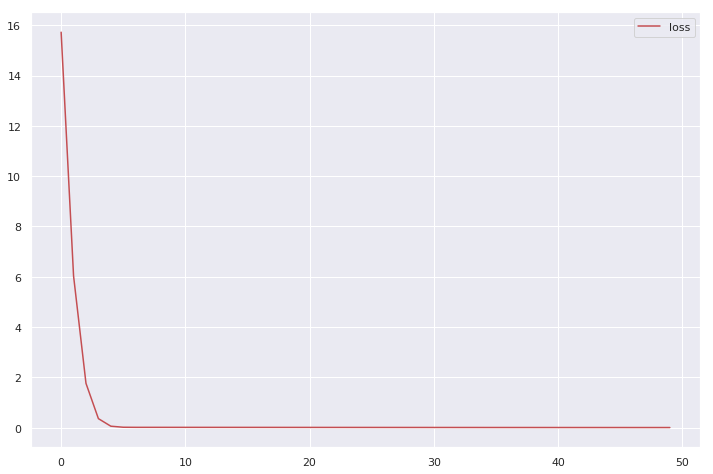

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history["loss"], c='r')
plt.legend(["loss"])
plt.show()

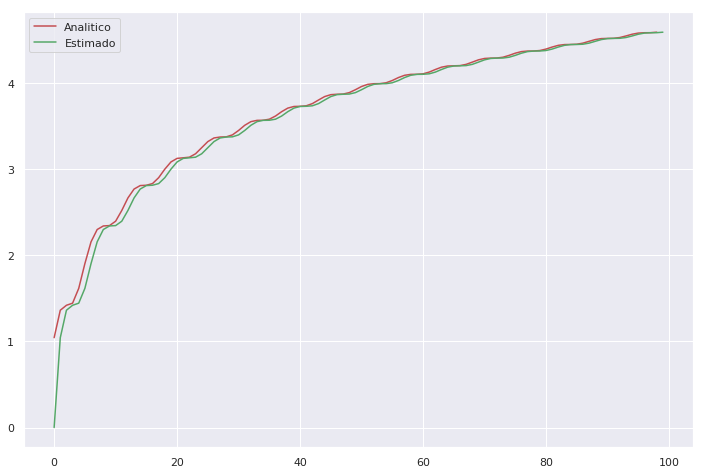

In [0]:
#Avalie o desempenho mostrando o erro de predição.
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 8))
plt.plot(y_test, c='r')
plt.plot(yn, c='g')
plt.legend(["Analitico", "Estimado"])
plt.show()

## Trabalho

##Pesquise sobre os métodos de determinação da arquitetura de uma rede neural perceptron de múltiplas camadas e apresente um algoritmo para esta finalidade. 

Para isso, há vários algoritmos idealizados. Um deles é o *GridSearch*, que dado as variáveis do modelo e seus possíveis valores, o programa é executado com cada combinação de parâmetros, buscando a melhor.


```
# Cria modelo com parâmetros a serem alterados
def create_model(hparams1=dvalue,
                 hparams2=dvalue,
                 ...
                 hparamsn=dvalue):
    # Model definition
    ...

model = KerasClassifier(build_fn=create_model) 

# Define valores que os parâmetros podem assumir
hparams1 = [2, 4, ...]
hparams2 = ['elu', 'relu', ...]
...
hparamsn = [1, 2, 3, 4, ...]

param_grid = dict(hparams1=hparams1, 
                  hparams2=hparams2, 
                  ...
                  hparamsn=hparamsn)

# Efetua o GridSearch, executando a código para cada combinação de 
# parâmetros
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=, 
                    cv=,
                    verbose=)
grid_result = grid.fit(x, y)
```

Outro algoritmo existente é semelhante ao anterior, porém os parâmetros são testados de forma aleatória.

```
# Define modelo com parâmetros a serem alterados
def create_model(hparams1=dvalue,
                 hparams2=dvalue,
                 ...
                 hparamsn=dvalue):
    # Model definition
    ...

model = KerasClassifier(build_fn=create_model) 

# Define os possíveis valores do parâmtros aleatóriamente
hparams1 = randint(1, 100)
hparams2 = ['elu', 'relu', ...]
...
hparamsn = uniform(0, 1)

param_dist = dict(hparams1=hparams1, 
                  hparams2=hparams2, 
                  ...
                  hparamsn=hparamsn)

# Executa o modelo para as combinações de parâmetros cujos valores
# foram definidos acima
n_iter_search = 16 # Number of parameter settings that are sampled.
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   n_jobs=, 
								   cv=, 
								   verbose=)
random_search.fit(X, Y)
```

## Desenvolva um trabalho sobre a rede neural convolutiva aplicada neste trabalho a classificação de padrões em imagens.

In [0]:
import os
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Input, Activation
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils, plot_model

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(f'Número de imagens para treinamento: {num_train}')
print(f'Número de imagens para teste: {num_test}')
print(f'Número de classes de imagens: {num_classes}')

Número de imagens para treinamento: 50000
Número de imagens para teste: 10000
Número de classes de imagens: 10


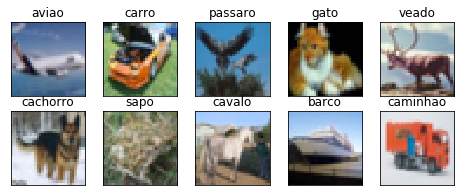

In [0]:
class_names = ['aviao','carro','passaro','gato','veado',
               'cachorro','sapo','cavalo','barco','caminhao']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num, ::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Normaliza os valores de entrada
X_train = train_features.astype('float32')/255
X_test = test_features.astype('float32')/255

# Transforma as classes das imagens em vetores codificados
y_train = np_utils.to_categorical(train_labels, num_classes)
y_test = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define o modelo
model = Sequential()

# Primeira camada convolucional
model.add(Conv2D(32, kernel_size=3, 
                     activation='relu', 
                     padding='same', 
                     input_shape=(32, 32, 3)))

# Segunda camada convolucional
model.add(Conv2D(96, kernel_size=3, 
                     activation='relu', 
                     padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Terceira camada convolucional
model.add(Conv2D(196, kernel_size=3, 
                      activation='relu', 
                      padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Quarta camada convolucional
model.add(Conv2D(196, kernel_size=3, 
                      activation='relu',
                      padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 32, 32, 96)        27744     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 196)       169540    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 196)         0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 8, 8, 196)       

In [0]:
# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treina o modelo
start = time.time()
model_info = model.fit(X_train, y_train, 
                       batch_size=128, epochs=100, 
                       validation_data = (X_test, y_test))
end = time.time()
print("O modelo levou ", end-start, " segundos para ser treinado")

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 32s 643us/step - loss: 1.7272 - acc: 0.3500 - val_loss: 1.2574 - val_acc: 0.5405
Epoch 2/100
50000/50000 [==============================] - 25s 502us/step - loss: 1.2043 - acc: 0.5696 - val_loss: 0.9649 - val_acc: 0.6534
Epoch 3/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.9814 - acc: 0.6564 - val_loss: 0.8214 - val_acc: 0.7194
Epoch 4/100
50000/50000 [==============================] - 25s 501us/step - loss: 0.8596 - acc: 0.7013 - val_loss: 0.7654 - val_acc: 0.7372
Epoch 5/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.7828 - acc: 0.7304 - val_loss: 0.7140 - val_acc: 0.7555
Epoch 6/100
50000/50000 [==============================] - 25s 500us/step - loss: 0.7296 - acc: 0.7475 - val_loss: 0.6685 - val_acc: 0.7712
Epoch 7/100
50000/50000 [==============================] - 25s 501us/step - loss: 0.6809 - acc: 0.7661 - val_l

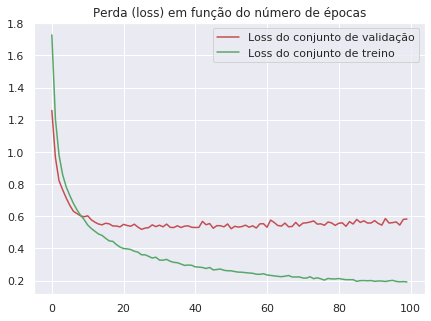

In [0]:
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.plot(model_info.epoch, model_info.history['val_loss'], c='r')
plt.plot(model_info.epoch, model_info.history['loss'], c='g')
plt.legend(["Loss do conjunto de validação", "Loss do conjunto de treino"])
plt.title("Perda (loss) em função do número de épocas")
plt.show()

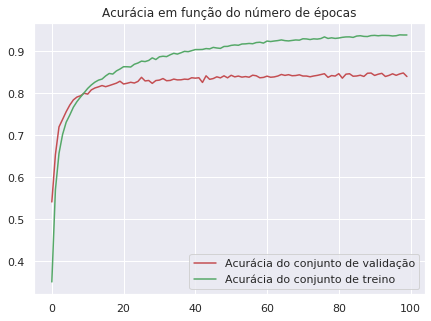

In [0]:
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.plot(model_info.epoch, model_info.history['val_acc'], c='r')
plt.plot(model_info.epoch, model_info.history['acc'], c='g')
plt.legend(["Acurácia do conjunto de validação", "Acurácia do conjunto de treino"])
plt.title("Acurácia em função do número de épocas")
plt.show()

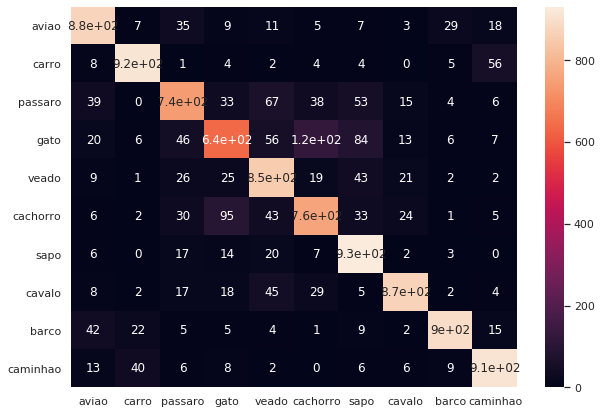

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

df_cm = pd.DataFrame(cm, index = [classe for classe in class_names],
                  columns = [classe for classe in class_names])
plt.figure(figsize = (10,7))
ax = sns.heatmap(df_cm, annot=True)
ax.set_ylim(10 ,0)
plt.show()